In [1]:
#fetching and viewing prices data table

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np

In [2]:
conn = sqlite3.connect('../geitems.db')
cur = conn.cursor()

In [3]:
cur.execute("""SELECT * FROM prices WHERE timestamp > 1659330000 and timestamp < 1662008400""")

In [4]:
response = cur.fetchall()

In [5]:
AugustDate = pd.DataFrame(response,columns=['id','item_id','timestamp','avgHighPrice','highPriceVolume','avgLowPrice','lowPriceVolume'])

In [6]:
conn.close()

In [8]:
# while(0<1):
#     conn = sqlite3.connect('../geitems.db')
#     cur = conn.cursor()
#     cur.execute("""SELECT * FROM prices""")
#     response = cur.fetchall()
#     conn.close()
#     tableContents = len(pd.DataFrame(response,columns=['id','item_id','timestamp','avgHighPrice','highPriceVolume','avgLowPrice','lowPriceVolume']).id)
#     print('Table Contains {tableContents} rows')

In [7]:
AugustDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16 non-null     int64  
 1   item_id          16 non-null     int64  
 2   timestamp        16 non-null     int64  
 3   avgHighPrice     7 non-null      float64
 4   highPriceVolume  16 non-null     int64  
 5   avgLowPrice      12 non-null     float64
 6   lowPriceVolume   16 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.0 KB


In [8]:
AugustDate.timestamp = pd.to_datetime(AugustDate.timestamp,unit='s')
AugustDate.avgHighPrice.replace('',np.nan,inplace=True)
AugustDate.avgLowPrice.replace('',np.nan,inplace=True)

In [9]:
AugustDate.avgHighPrice = AugustDate.avgHighPrice.astype(float,errors='ignore')
AugustDate.avgLowPrice = AugustDate.avgLowPrice.astype(float)

In [10]:
AugustDate.index = AugustDate.timestamp

In [11]:
AugustDate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2022-08-04 04:55:00 to 2022-08-28 19:40:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               16 non-null     int64         
 1   item_id          16 non-null     int64         
 2   timestamp        16 non-null     datetime64[ns]
 3   avgHighPrice     7 non-null      float64       
 4   highPriceVolume  16 non-null     int64         
 5   avgLowPrice      12 non-null     float64       
 6   lowPriceVolume   16 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.0 KB


In [12]:
August1h = AugustDate.resample('1h').mean()

In [13]:
August1391_1h = AugustDate.loc[AugustDate.item_id == 1391].resample('1h').mean()

IndexError: index 0 is out of bounds for axis 0 with size 0

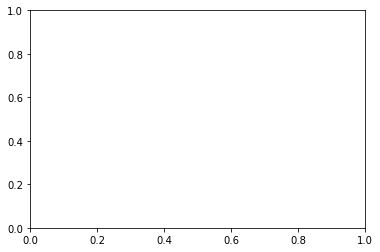

In [14]:
August1391_1h.plot(y='avgHighPrice',kind='line')